4.2 Predicting Future Stock Prices with LSTM in TensorFlow Keras

Data set from the Yahoo finance ... with the Nike's data!
Before that is the tensorflow is upgrade or not because we are going to use the tensorflow  package

In [5]:
# checking the tensorflow is installed and check for the most recent version for the tensorflow
!pip install--upgrade tensorflow

ERROR: unknown command "install--upgrade" - maybe you meant "install"


#Import the Dataset
From this we could get the dataset from Yahoofinance website.

since I am using the Nike dataset for my own try!
https://finance.yahoo.com/quote/NKE?p=NKE&.tsrc=fin-srch

will be my link.


##For the dataset, we need the two dataset which are for train and test.
###For the Train dataset, usually use the longterm for training, For the the test dataset, usually use the shortterm for the testing
###Therefore, the size of the training dataset and test dataset are different each other.

In [7]:
## for importing libraries
import pandas as pd
import numpy as np

## import the dataset 
## I downloaded my dataset in local computer and upload on the colab to check the dataset

nk_complete_data = pd.read_csv("/content/NKE_train.csv")

Checks if the dataset read in properly.

In [8]:
nk_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,48.275002,48.474998,47.055000,47.514999,43.770935,4985800
1,2015-01-05,47.255001,47.275002,46.564999,46.750000,43.066204,6889200
2,2015-01-06,46.945000,47.075001,46.035000,46.474998,42.812881,7576000
3,2015-01-07,46.805000,47.650002,46.549999,47.435001,43.697227,7256000
4,2015-01-08,47.830002,48.549999,47.810001,48.529999,44.705956,5978200


The output shows that our dataset consists of seven columns. However, in this section, we are only interested in the Open column. Therefore, we will select the Open column from the dataset.

In [9]:
# we are make the data set in the right feature for predicting the trends
nk_training_processed = nk_complete_data[['Open']].values

In [10]:
#Scaling feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
nk_training_scaled = scaler.fit_transform(nk_training_processed)

In [11]:
### check the lenth of the training scaled dataset
len(nk_training_scaled)

1993

Our feature set will consist of 60 timesteps of 1 feature. The feature set basically consists of the opening stock price of the past 60 days

In [12]:
#training features contained data of last 60 days
#training labels contain data of 61st day
nk_training_features= []
nk_training_labels = []
for i in range(60, len(nk_training_scaled)):
  nk_training_features.append(nk_training_scaled[i-60:i,0])
  nk_training_labels.append(nk_training_scaled[i, 0])

In [13]:
#converting training data to numpy arrays
X_train = np.array(nk_training_features)
y_train = np.array(nk_training_labels)

In [14]:
print(X_train.shape)
print(y_train.shape)

(1933, 60)
(1933,)


We need to reshape our oinput feature into a three dimensional format

In [15]:
#Converting data into 3D shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

The following script creates our LSTM model. We have four LSTM layers with 100 nodes each. Each LSTM layer is followed by a dropout layer to avoid overfitting. The final dense layer has one node since the output is a single value.

In [16]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout,  Flatten, LSTM
from tensorflow.keras.models import Model

In [17]:
#defining the LSTM network
## From this we are using LSTM function for calculate the trends which is a type of RNN model
input_layer = Input(shape = (X_train.shape[1], 1))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation='relu')(do3) 
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

Next, we need to convert the output y into a column vector.

In [18]:
print(X_train.shape)
print(y_train.shape)

y_train= y_train.reshape(-1,1)
print(y_train.shape)

(1933, 60, 1)
(1933,)
(1933, 1)


The following script trains our stock price prediction model on the training set

In [19]:
#training the model
model_history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size = 32)

Epoch 1/100
61/61 [==============================] - 18s 209ms/step - loss: 0.0274
Epoch 2/100
61/61 [==============================] - 13s 209ms/step - loss: 0.0045
Epoch 3/100
61/61 [==============================] - 13s 209ms/step - loss: 0.0039
Epoch 4/100
61/61 [==============================] - 13s 208ms/step - loss: 0.0043
Epoch 5/100
61/61 [==============================] - 13s 209ms/step - loss: 0.0035
Epoch 6/100
61/61 [==============================] - 13s 207ms/step - loss: 0.0036
Epoch 7/100
61/61 [==============================] - 13s 210ms/step - loss: 0.0032
Epoch 8/100
61/61 [==============================] - 14s 228ms/step - loss: 0.0033
Epoch 9/100
61/61 [==============================] - 13s 207ms/step - loss: 0.0027
Epoch 10/100
61/61 [==============================] - 13s 208ms/step - loss: 0.0030
Epoch 11/100
61/61 [==============================] - 13s 208ms/step - loss: 0.0031
Epoch 12/100
61/61 [==============================] - 13s 209ms/step - loss: 0.0027
E

Testing the Stock Prediction Model


*   The test data should also be converted into the right shape to test our stock prediction model. We will do that later.
*   Let’s first import the data and then remove all the columns from the test data except the Open column.

Importing Test data set

In [21]:
#creating test set
nk_testing_complete_data = pd.read_csv("/content/NKE_test.csv")
nk_testing_processed = nk_testing_complete_data[['Open']]. values

Let’s concatenate the training and test sets. We do this because to predict the first value in the test set, the input will be the data from the past 60 days, which is basically the data from the last 60 days in the training set.

In [22]:
nk_all_data = pd.concat((nk_complete_data['Open'], nk_testing_complete_data['Open']), axis=0)

In [23]:
test_inputs = nk_all_data [len(nk_all_data) - len(nk_testing_complete_data) - 60:].values
print(test_inputs.shape)

(81,)


In [24]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(81, 1)


In [25]:
nk_test_features = []
for i in range(60, 80):
  nk_test_features.append(test_inputs[i-60:i, 0])

In [26]:
X_test = np.array(nk_test_features)
print(X_test.shape)

(20, 60)


Our feature set is currently 2-dimensional. But the LSTM algorithm in Keras accepts data in 3-dimensional. The following script converts our input features into a 3-dimensional shape.

In [27]:
#converting test data into 3D shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test. shape[1], 1))
print(X_test.shape)

(20, 60, 1)


Now is the time to make predictions on the test set.

In [28]:
#making predictions on test set
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 643ms/step


Since we scaled our input feature, we need to apply the inverse_transform() method of the scaler object on the predicted output to get the original output values.

In [29]:
#converting scaled data back to original data
y_pred = scaler.inverse_transform(y_pred)

Finally, to compare the predicted output with the actual stock price values, you can plot the two values

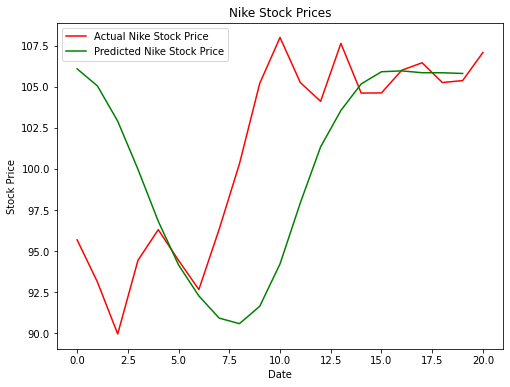

In [31]:
#plotting original and predicted stock values
plt.figure(figsize=(8,6))
plt.plot(nk_testing_processed, color='red', label='Actual Nike Stock Price')
plt.plot(y_pred , color='green', label='Predicted Nike Stock Price')
plt.title('Nike Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

The output shows that our algorithm has been able to partially capture the trend of the future opening stock prices for Nike Data